In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [ ]:
spam = pd.read_csv("spam.csv",encoding="ISO-8859-1")
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
spam.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Text(0.5, 0, 'Type of Mail')

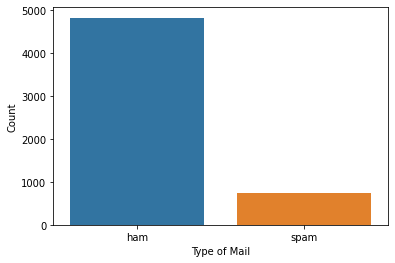

In [ ]:
sns.countplot(x='v1',data=spam)
plt.ylabel("Count")
plt.xlabel("Type of Mail")

In [ ]:
x = spam['v2']
y = spam["v1"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

SVM

In [ ]:
cv=CountVectorizer()
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [ ]:
model=svm.SVC()
model.fit(x_train,y_train)


SVC()

In [ ]:
acc1=model.score(x_test,y_test)
print("Accuracy:",acc1)

Accuracy: 0.9757847533632287


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       975
        spam       0.97      0.83      0.90       140

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Confusion Matrix: 
 [[972   3]
 [ 24 116]]

Accuracy:  0.9757847533632287


 NAIVE BAYES

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(text):
    
    #1 Remove Punctuations
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [ ]:
#Applying Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#Print the predictions
print(classifier.predict(x_train))

#Print the actual values
print(y_test.values)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [ ]:
#Evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(x_test)

print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
acc2=accuracy_score(y_test,pred)
print('Accuracy: ',acc2 )

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       975
        spam       0.95      0.93      0.94       140

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix: 
 [[968   7]
 [ 10 130]]

Accuracy:  0.9847533632286996


In [ ]:
#Comapring Accuracies
if acc1>acc2:
    print("SVM has higher accuracy")
else: 
    print("Naive Bayes Classifier has higher accuracy")

Naive Bayes Classifier has higher accuracy
